## Issue: reading a POP dataset, longitude and latitude are 2D arrays

POP output is typically on a displaced-pole grid (the grid is rotated so that the north pole is centered in Greenland) - computation can't be done on a regular lat-lon grid because the north pole is over ocean and we don't want grid convergence in the computational domain. That means we don't want to plot according to the `nlat` and `nlon` dimensions, we want the latitude to be `TLAT(nlat,nlon)` and the longitude to be `TLONG(nlat,nlon)`.

#### Environment (I call this "xarray-issue")

* python 3.6.6
* matplotlib 2.2.2
* xarray 0.10.8
* jupyterlab 0.33.4

#### Notebook walk-through

Prior to creating this ticket, I created a dataset that contains a 2D variable (`SSH`: sea surface height) on the native POP grid. The dataset also includes the 2D variables `TLAT` and `TLON`, and they are recognized as coordinates by `xarray`.

In [1]:
import xarray as xr

ds = xr.open_dataset('./POP_SSH.nc')

First attempt to plot: just use xarray's `DataArray.plot()` function

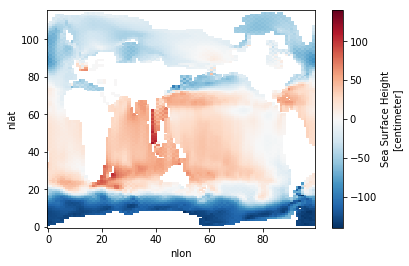

In [2]:
%matplotlib inline

ds['SSH'].plot()

It looks okay (land data is clearly being masked out), but it's ignoring `TLAT` and `TLON` so Greenland is at the top of the map. I found http://xarray.pydata.org/en/stable/examples/multidimensional-coords.html#plotting and started investigating `DataArray.plot.pcolormesh()`. If you don't specify any arguments, it looks a lot like `plot()`, which makes sense.

**ISSUE:** If I specify `x` and `y`, there's some weird fill-value algorithm at play. The southern hemisphere looks pretty good, though Australia now has sea-surface height data covering the continent. The northern hemisphere is a mess. Maybe some weird fill-pattern is to blame? In theory this command should do what I want, right?

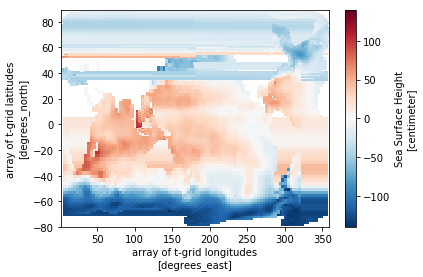

In [3]:
ds['SSH'].plot.pcolormesh(x='TLONG',y='TLAT')